<a href="https://colab.research.google.com/github/bnsreenu/python_for_image_processing_APEER/blob/master/91_binary_classification_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do not forget to sign up for your free APEER account to use pre-built machine learning tools for semantic and instance segmentation
www.apeer.com

In [ ]:
"""
Training Video: https://youtu.be/kbkLLPcyU-Q

Dataset information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
## 'data.frame':    569 obs. of  31 variables:
##  $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...
##  $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
##  $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
##  $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
##  $ area_mean              : num  1001 1326 1203 386 1297 ...
##  $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
##  $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
##  $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
##  $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
##  $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
##  $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
##  $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
##  $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
##  $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
##  $ area_se                : num  153.4 74.1 94 27.2 94.4 ...
##  $ smoothness_se          : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
##  $ compactness_se         : num  0.049 0.0131 0.0401 0.0746 0.0246 ...
##  $ concavity_se           : num  0.0537 0.0186 0.0383 0.0566 0.0569 ...
##  $ concave.points_se      : num  0.0159 0.0134 0.0206 0.0187 0.0188 ...
##  $ symmetry_se            : num  0.03 0.0139 0.0225 0.0596 0.0176 ...
##  $ fractal_dimension_se   : num  0.00619 0.00353 0.00457 0.00921 0.00511 ...
##  $ radius_worst           : num  25.4 25 23.6 14.9 22.5 ...
##  $ texture_worst          : num  17.3 23.4 25.5 26.5 16.7 ...
##  $ perimeter_worst        : num  184.6 158.8 152.5 98.9 152.2 ...
##  $ area_worst             : num  2019 1956 1709 568 1575 ...
##  $ smoothness_worst       : num  0.162 0.124 0.144 0.21 0.137 ...
##  $ compactness_worst      : num  0.666 0.187 0.424 0.866 0.205 ...
##  $ concavity_worst        : num  0.712 0.242 0.45 0.687 0.4 ...
##  $ concave.points_worst   : num  0.265 0.186 0.243 0.258 0.163 ...
##  $ symmetry_worst         : num  0.46 0.275 0.361 0.664 0.236 ...
##  $ fractal_dimension_worst: num  0.1189 0.089 0.0876 0.173 0.0768 ...

"""

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wisconsin_breast_cancer_dataset.csv")

In [ ]:
print(df.describe().T)

                         count          mean  ...           75%           max
ID                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave.points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01 

In [ ]:
print(df.isnull().sum())
#df = df.dropna()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave.points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave.points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave.points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'Diagnosis':'Label'})
print(df.dtypes)

ID                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave.points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave.points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

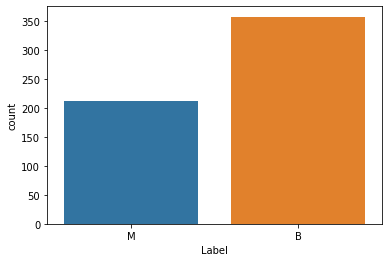

In [ ]:
#Understand the data 
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "ID"], axis=1) 
print(X.describe().T) #Needs scaling

                         count        mean  ...          75%         max
radius_mean              569.0   14.127292  ...    15.780000    28.11000
texture_mean             569.0   19.289649  ...    21.800000    39.28000
perimeter_mean           569.0   91.969033  ...   104.100000   188.50000
area_mean                569.0  654.889104  ...   782.700000  2501.00000
smoothness_mean          569.0    0.096360  ...     0.105300     0.16340
compactness_mean         569.0    0.104341  ...     0.130400     0.34540
concavity_mean           569.0    0.088799  ...     0.130700     0.42680
concave.points_mean      569.0    0.048919  ...     0.074000     0.20120
symmetry_mean            569.0    0.181162  ...     0.195700     0.30400
fractal_dimension_mean   569.0    0.062798  ...     0.066120     0.09744
radius_se                569.0    0.405172  ...     0.478900     2.87300
texture_se               569.0    1.216853  ...     1.474000     4.88500
perimeter_se             569.0    2.866059  ...    

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 2s 74ms/step - loss: 0.7125 - accuracy: 0.3820 - val_loss: 0.7045 - val_accuracy: 0.3776
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7029 - accuracy: 0.3789 - val_loss: 0.6921 - val_accuracy: 0.3776
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.4116 - val_loss: 0.6814 - val_accuracy: 0.3776
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.4769 - val_loss: 0.6720 - val_accuracy: 0.4755
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6821 - accuracy: 0.5031 - val_loss: 0.6634 - val_accuracy: 0.6783
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6618 - accuracy: 0.6793 - val_loss: 0.6547 - val_accuracy: 0.8462
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6622 - accuracy: 0.6830 - val_loss: 0.6455 - val_accuracy: 0.8811
Epoch 8/100
7/7 [=========

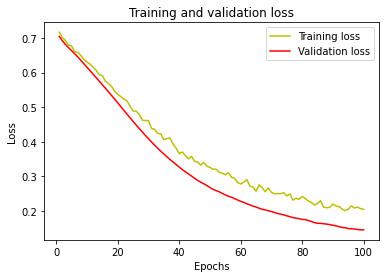

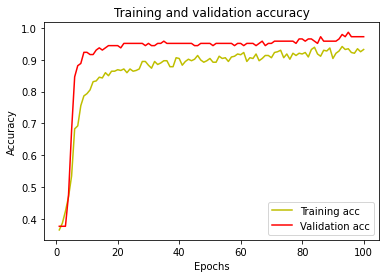

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

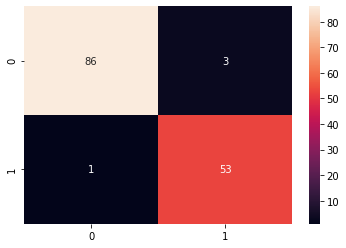

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)